<a href="https://colab.research.google.com/github/MarkStephens060482/Big-Data-projects/blob/main/Road_Accident_Severity_EDA_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Severity of Road Accidents
### Mark Stephens

### Exploratory Data Analysis and Visualisation

In [ ]:
!pip install plotly==5.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


Import the packages to be used and mount G Drive to retrieve and store files.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, glob
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
# mount G Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read processed data set into Jupyter notebook.

In [ ]:
#_________The data files are to be loaded into sub folder of the current working directory called 'data'________
PATH = '/content/drive/MyDrive/Big Data and Industry Project/exploratory data analysis/'
# load the data into a pandas dataframe
files = glob.glob(PATH + "*.csv")
dfs=[]
# read the csv files one at a time and concatenate to a dataframe.
for file in files:
    with open(file,encoding="utf-8") as dataFile:
      df = pd.read_csv(dataFile, index_col = ['ACCIDENT_NO'])
      dfs.append(df)

#read csv files, parse index column and assign to dataframe object
fata_df = dfs[0]
complete_df = dfs[1]

Inspect Complete dataframe

In [ ]:
complete_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60685 entries, T20150013818 to T20220019338
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACCIDENT_DATE              60685 non-null  object 
 1   ACCIDENT_TIME              60685 non-null  object 
 2   DAY_OF_WEEK                60685 non-null  object 
 3   HIT_RUN_FLAG               60685 non-null  object 
 4   LIGHT_CONDITION            60685 non-null  object 
 5   SPEED_ZONE                 60685 non-null  object 
 6   NODE_ID                    60685 non-null  int64  
 7   LONGITUDE                  60685 non-null  float64
 8   LATITUDE                   60685 non-null  float64
 9   LGA_NAME                   60685 non-null  object 
 10  REGION_NAME                60685 non-null  object 
 11  TOTAL_PERSONS              60685 non-null  int64  
 12  INJ_OR_FATAL               60685 non-null  int64  
 13  FATALITY                   60685 

In [ ]:
complete_df.describe()

NODE_ID     LONGITUDE      LATITUDE  TOTAL_PERSONS  INJ_OR_FATAL  \
count   60685.00000  60685.000000  60685.000000   60685.000000  60685.000000   
mean   234410.32148    144.971150    -37.700734       2.351718      1.308231   
std    140608.21657      0.836548      0.582625       1.511044      0.782819   
min         4.00000    140.966488    -39.023993       1.000000      0.000000   
25%     51684.00000    144.832271    -37.957391       2.000000      1.000000   
50%    303840.00000    145.016502    -37.814770       2.000000      1.000000   
75%    326826.00000    145.214946    -37.689543       3.000000      1.000000   
max    756136.00000    149.757513    -34.038085      89.000000     41.000000   

           FATALITY  SERIOUSINJURY   OTHERINJURY    NONINJURED         MALES  \
count  60685.000000   60685.000000  60685.000000  60685.000000  60685.000000   
mean       0.022065       0.464662      0.821504      0.990805      1.300915   
std        0.156034       0.658569      0.786715      1.267790      0.985760   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      1.000000   
50%        0.000000       0.000000      1.000000      1.000000      1.000000   
75%        0.000000       1.000000      1.000000      1.000000      2.000000   
max        6.000000      18.000000     25.000000     87.000000     30.000000   

       ...  PUBLICVEHICLE          temp     feelslike      humidity  \
count  ...   60685.000000  60685.000000  60685.000000  60685.000000   
mean   ...       0.012441     16.465807     16.145827     65.187490   
std    ...       0.112028      6.520916      6.721263     20.176115   
min    ...       0.000000     -5.100000    -11.100000      4.900000   
25%    ...       0.000000     11.900000     11.900000     51.700000   
50%    ...       0.000000     15.600000     15.600000     66.300000   
75%    ...       0.000000     20.300000     20.300000     80.740000   
max    ...       2.000000     46.300000     46.300000    110.673152   

                dew        precip     windspeed       winddir    cloudcover  \
count  60685.000000  60685.000000  60685.000000  60685.000000  60685.000000   
mean       8.914525      0.061898     14.377487    204.341567     49.160901   
std        4.110409      0.691313      8.604810    107.339428     39.454439   
min      -22.400000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      0.000000      8.100000    140.000000      5.400000   
50%        8.600000      0.000000     13.000000    210.000000     50.000000   
75%       11.600000      0.000000     19.300000    290.000000     91.300000   
max       23.700000     60.528000     85.200000    360.000000    100.000000   

          moonphase  
count  60685.000000  
mean       0.483977  
std        0.288182  
min        0.000000  
25%        0.250000  
50%        0.500000  
75%        0.750000  
max        0.980000  

[8 rows x 38 columns]

##Types of variables
There are two types of variables given in the dataset: Pre-accident variables and Post - accident variables.
*   Pre-accident variables are know prior to the accident. These variables encompass information that is available before the occurrence of the accident. Examples are accident date , time and day of the week, light condition, speed zone, location, sex of driver, alcohol related, licenced. These variables will be used as input features in the predictive model.

The pre-accident variables fit into sub-groups of spatio-temporal features, road attributes, road user attributes, accident attributes and meteorological conditions.

*   Post-accident: These variables are determined and recorded after the road accident has occurred. They are related to the severity of the accident and its immediate consequences. Examples include number of injured individuals, number of fatalities, etc. These variables represent the outcome or target variable for your predictive model.

In [ ]:
import numpy as np
# seperate the possible post-accident target variables.
post_accident_variables_list = ['SEVERITY','INJ_OR_FATAL','FATALITY','SERIOUSINJURY','OTHERINJURY','NONINJURED']
post_accident_variables = complete_df[post_accident_variables_list].copy()
# seperate the pre - accident variables
pre_accident_variables = complete_df.drop(columns = post_accident_variables).copy()
# seperate the numerical and categorical variables
#numeric variables list
pre_accident_numeric_list = pre_accident_variables.select_dtypes(include=np.number).columns.tolist()
#numeric variables
pre_accident_numeric = pre_accident_variables[pre_accident_numeric_list].copy()
#categorical variables
pre_accident_categorical = pre_accident_variables.drop(columns = pre_accident_numeric_list ).copy()
# seperate continuous numeric variables
pre_accident_numeric_continuous = pre_accident_numeric[pre_accident_numeric.select_dtypes(include='float64').columns.tolist()].copy()
# seperate discrete numeric variables
pre_accident_numeric_discrete = pre_accident_numeric.drop(columns = pre_accident_numeric.select_dtypes(include='float64').columns.tolist()).copy()

Produce a value count and class distribution of **SEVERITY** variable.

Other injury accident      35359
Serious injury accident    24052
Fatal accident              1274
Name: SEVERITY, dtype: int64


Text(0.5, 1.0, 'Figure 1: Class counts and proportions')

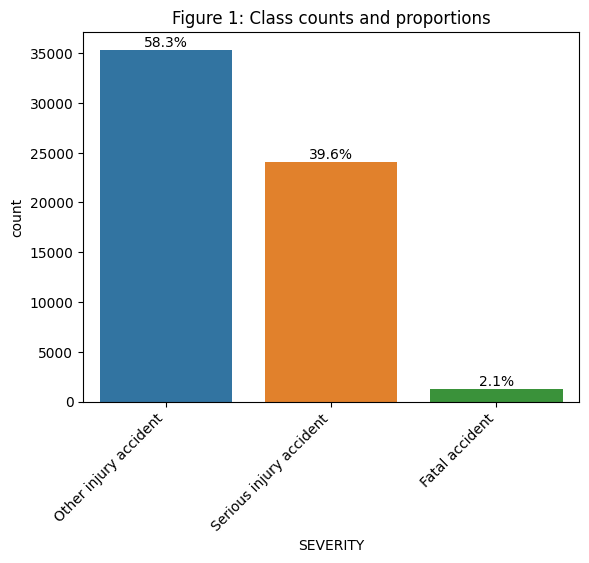

In [ ]:
# Count the possible target variable
target_count = post_accident_variables['SEVERITY'].value_counts()
print(target_count)
#plot the class proportions
ncount = len(post_accident_variables['SEVERITY'])
ax = sns.countplot(x = post_accident_variables['SEVERITY'])
for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the t
ax.set_xticklabels(ax.get_xticklabels(),  rotation = 45, ha="right")
ax.set_title('Figure 1: Class counts and proportions')

To address the highly unbalanced data set, resampling could be used during the modelling stage. SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesising elements for the minority class, based on those that already exist. It works randomly picing a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. The **SMOTENC** function from **imblearn** package can be used for performing SMOTE for mixed datasets of both continuous and categorical variables.

Produce a pairplot of a sample of numeric continuous variables together with severity to identify any correlation amoungst variables and seperation in distributions of severity classes. Disproportionate stratified random sampling of the whole dataset is performed in order to identify any differences  between the classes across the different variables.

Text(0.5, 1.03, 'Figure 2: Pair Plot of continuous numerical variables with target variable.')

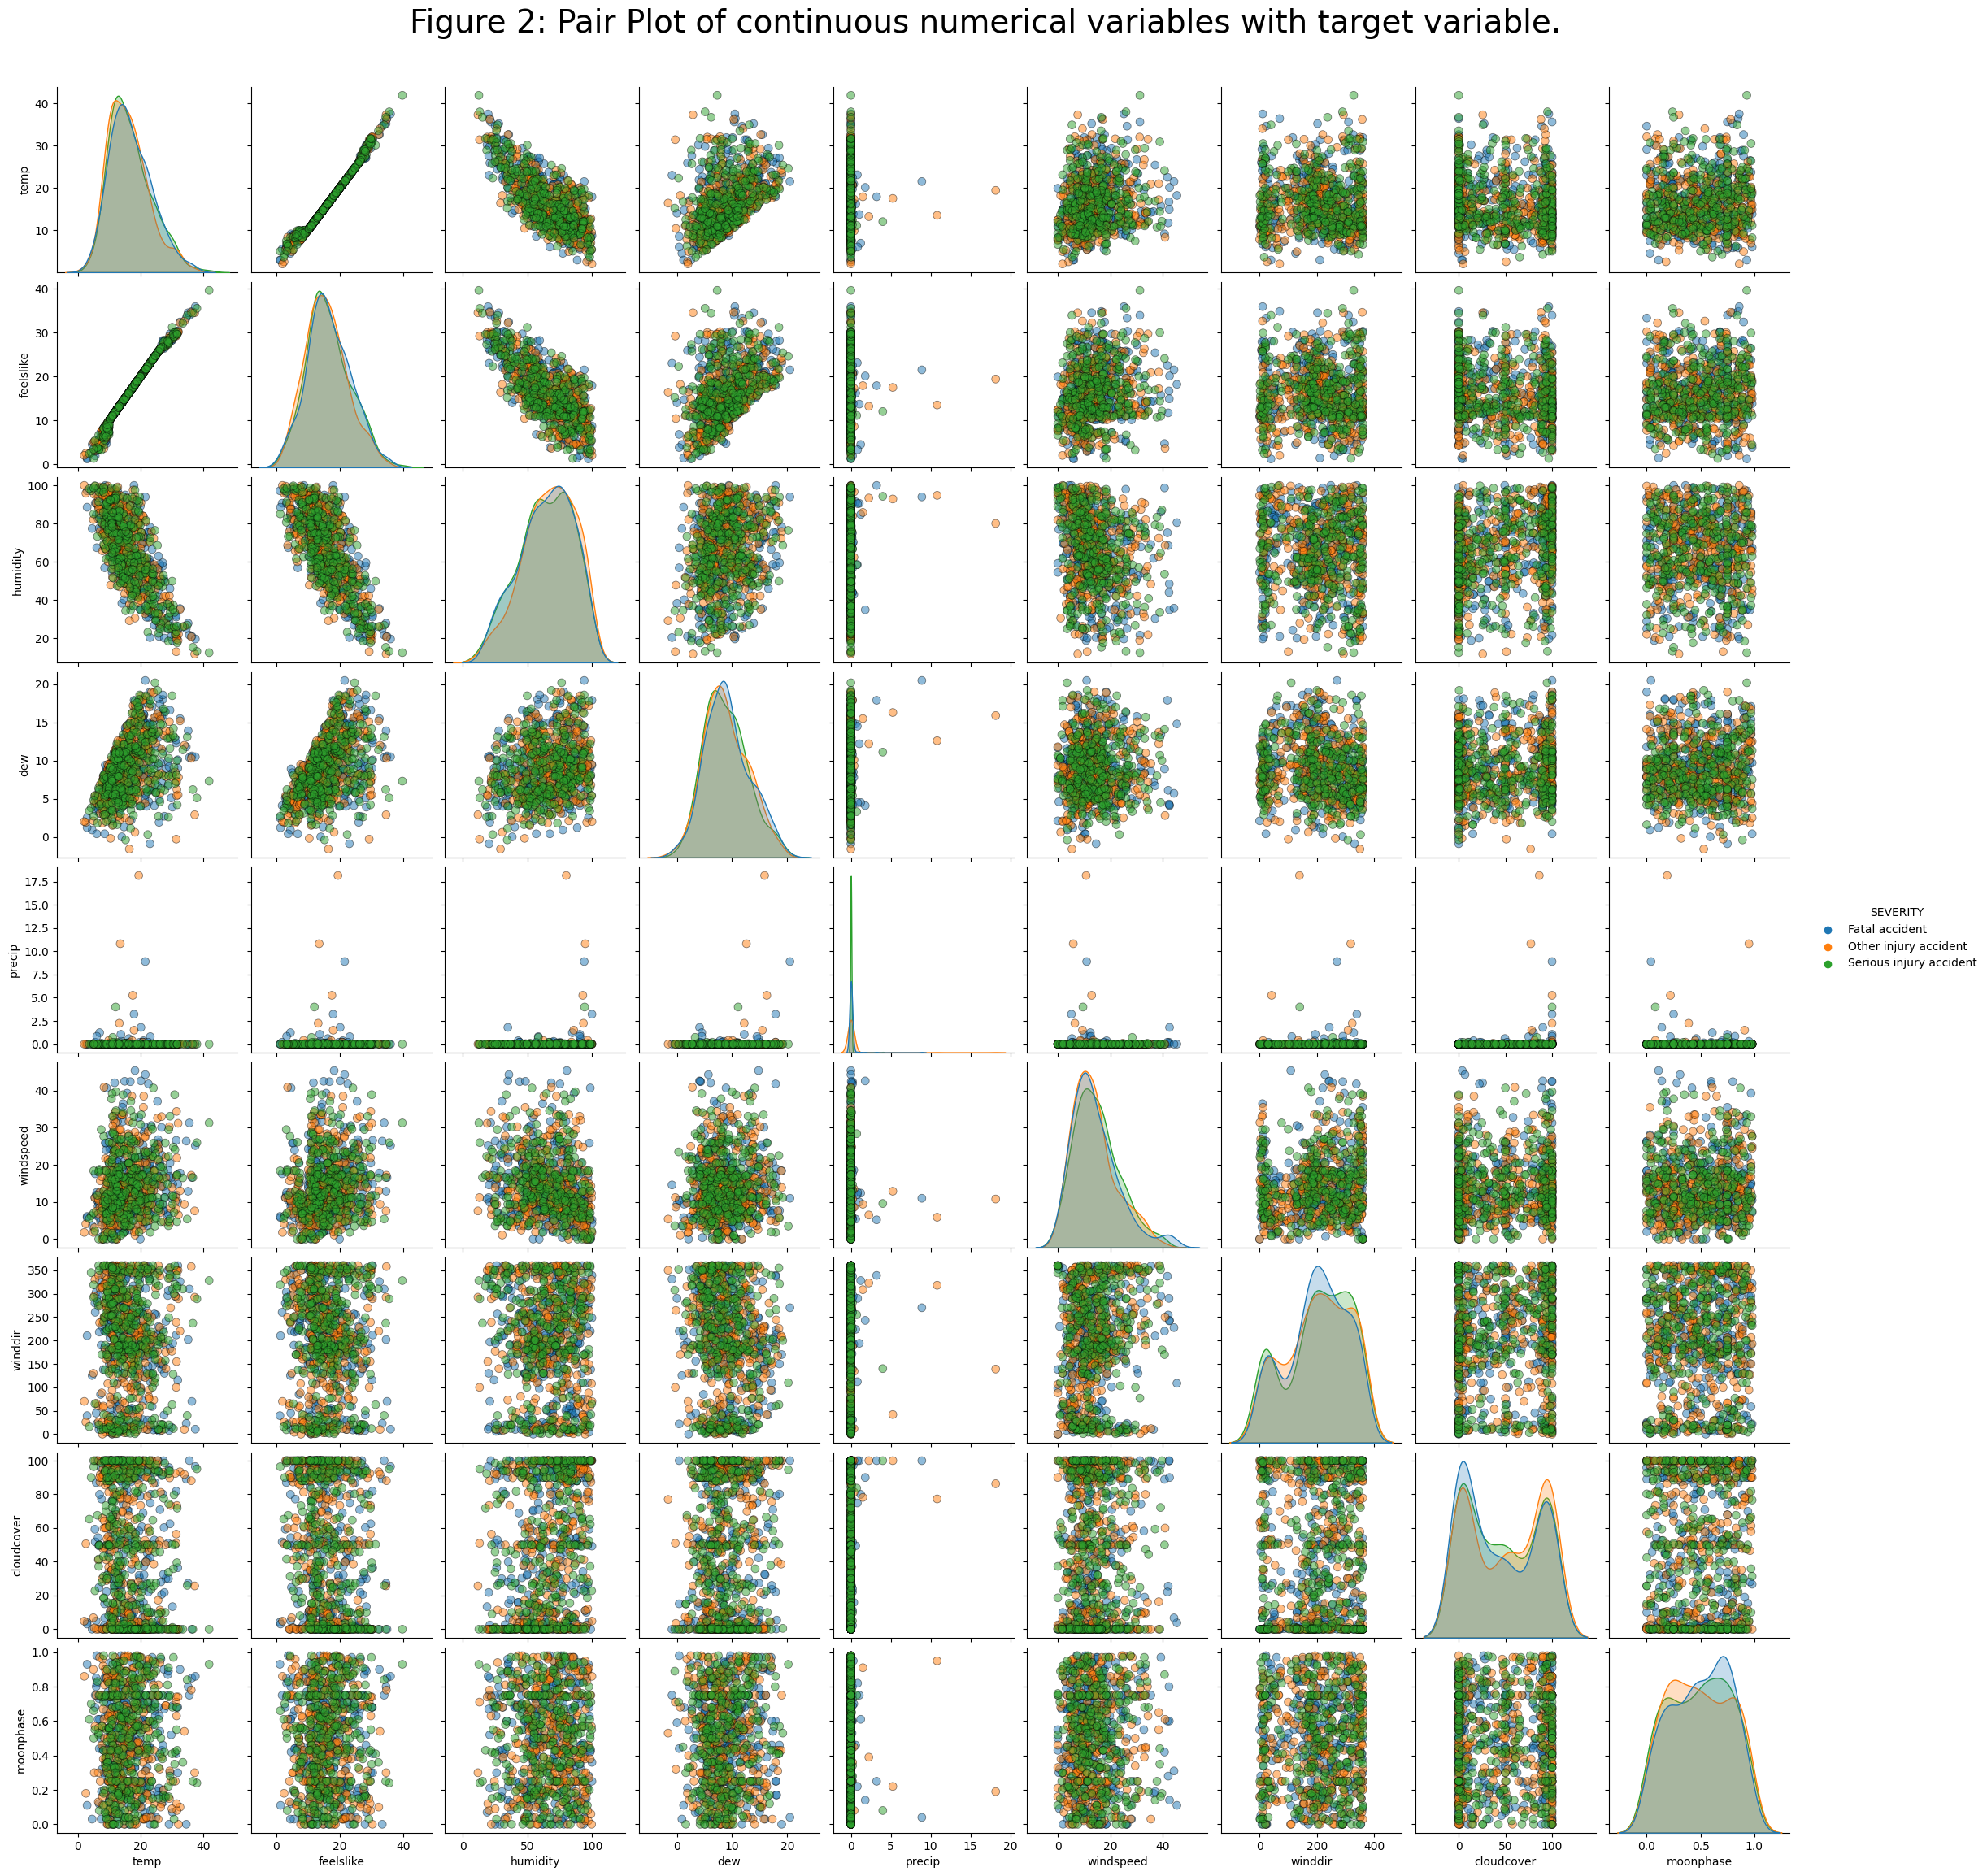

In [ ]:
## join target variable to continuous variables
continuous_plot_data = pre_accident_numeric_continuous.join(post_accident_variables['SEVERITY'])
## remove geographical coordinates of Longitude and Latitude.
continuous_plot_data = continuous_plot_data.drop(columns = ['LONGITUDE','LATITUDE'])
# Take a random sample of the dataset
continuous_plot_sample = continuous_plot_data.groupby('SEVERITY', group_keys = False).apply(lambda x: x.sample(300))
sns.pairplot(continuous_plot_sample, hue = 'SEVERITY',plot_kws = {'alpha': 0.5, 's': 50, 'edgecolor': 'k'})
# Title
plt.suptitle(f'Figure 2: Pair Plot of continuous numerical variables with target variable.',
             size = 28,
             y=1.03)

A correlation matrix for continuous variables is to be determined.

Text(0.5, 0.9, 'Figure 3: Heatmap of correlation matrix of numeric variables')

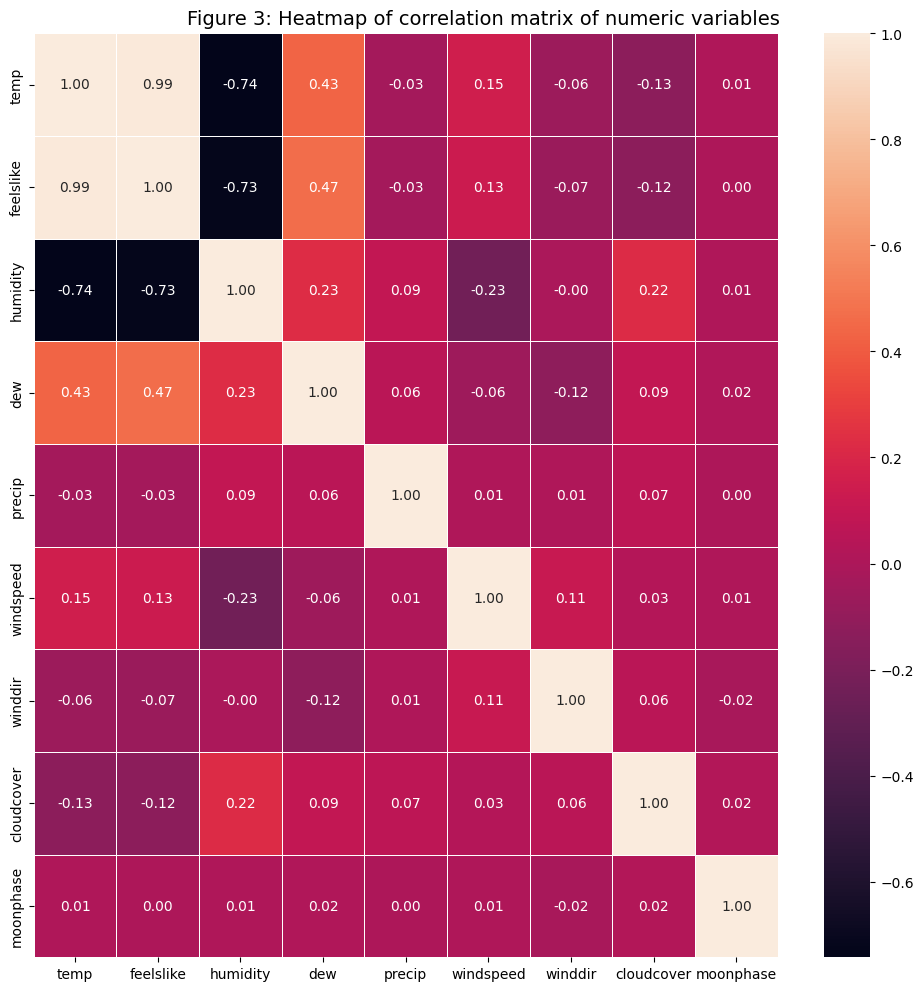

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(continuous_plot_data.corr(numeric_only = True),annot = True, fmt='.2f', linewidths=.5)
plt.suptitle("Figure 3: Heatmap of correlation matrix of numeric variables", y = 0.9, size = 14 )

Figures 2 and 3 highlight that there is little collinearity amongst continuous variables except for the variables **feelslike** and **temp** which are highly correlated. Figure 2 shows that the variable **precip** has a high incident of 0 values and is heavily right-skewed. The kernel density estimation plot of the $Log$ transformed precipitation variable,**log_precip**, is provided below:

Text(0.5, 0, 'log precipitation')

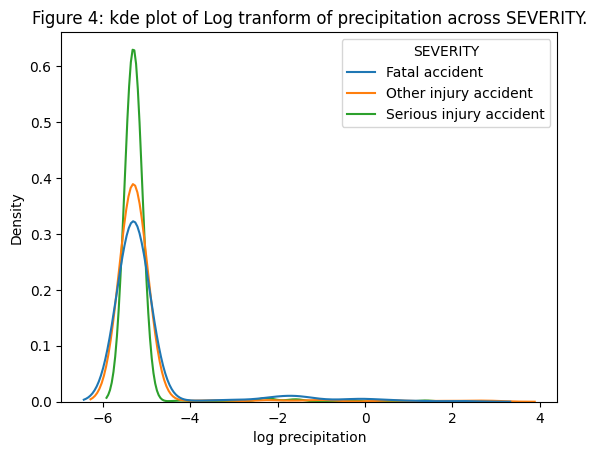

In [ ]:
offset = continuous_plot_sample['precip'].where(lambda x: x > 0).min()/2
continuous_plot_sample['log_precip'] = continuous_plot_sample['precip'].apply(lambda x: np.log(x + offset))
sns.kdeplot(data=continuous_plot_sample, x='log_precip',  hue='SEVERITY')
plt.title('Figure 4: kde plot of Log tranform of precipitation across SEVERITY.')
plt.xlabel('log precipitation')

The kde plots for the meteorological variables do not exhibit much seperation in the accident severity classes and may not contribute much explanation of the variation in severity.

### Temporal influences
The trends in the target variable of **SEVERITY** are to be observed over different time periods and examined against different temporal influences.

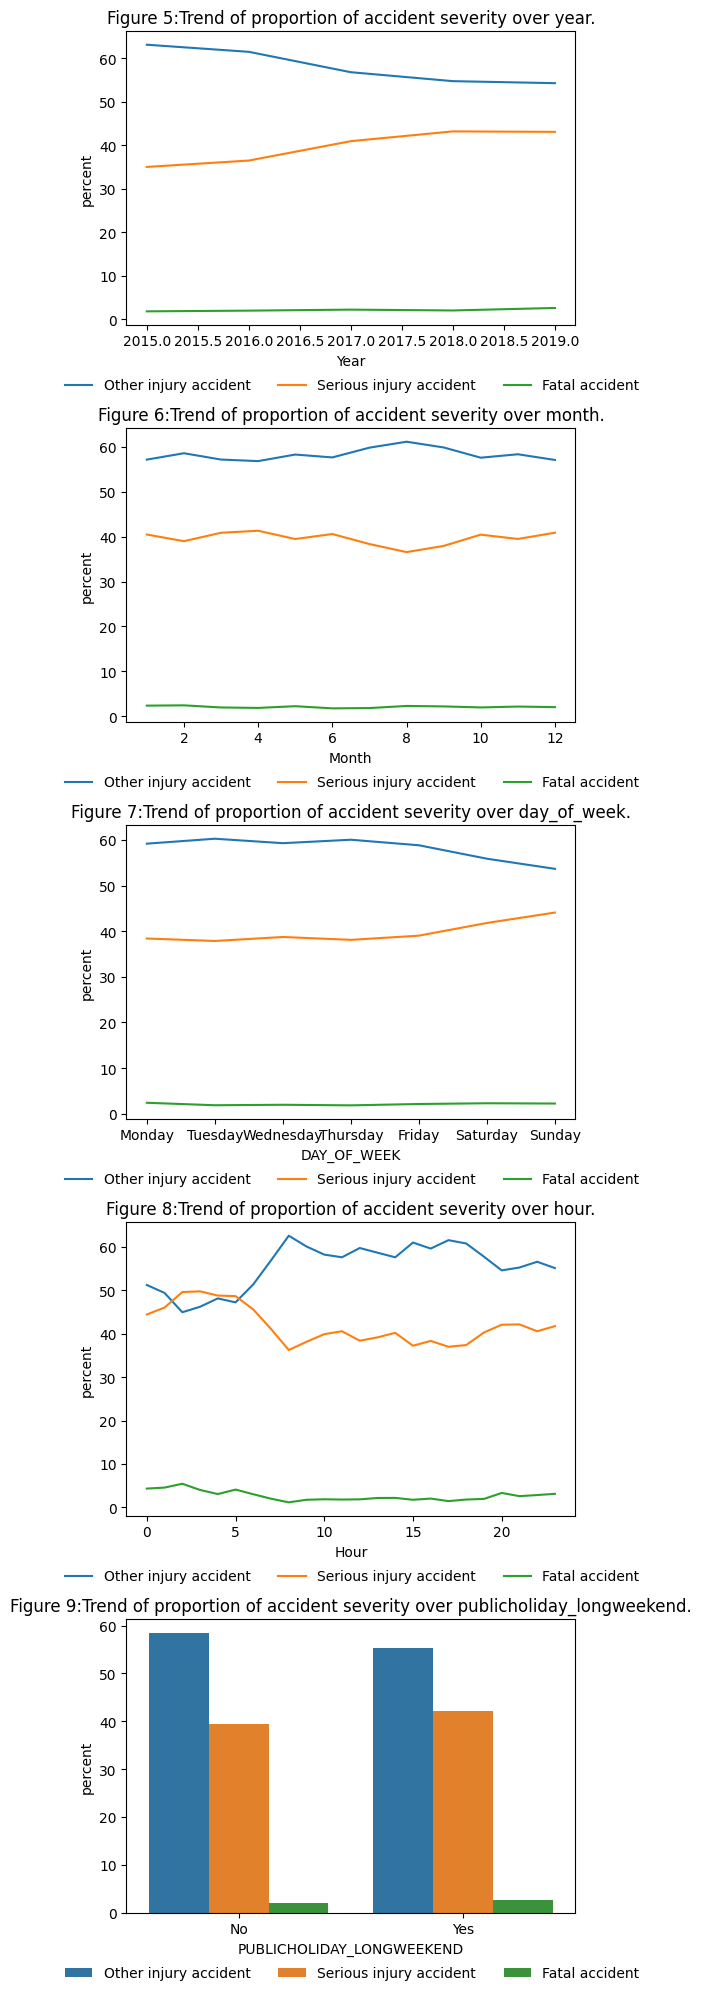

In [ ]:
from pandas.api.types import CategoricalDtype
time_plot_data = pd.DataFrame()
#Identify the Year
time_plot_data['Year'] = pd.to_datetime(pre_accident_categorical['ACCIDENT_DATE']).dt.year
#Identify the Month
time_plot_data['Month'] = pd.to_datetime(pre_accident_categorical['ACCIDENT_DATE']).dt.month
#Include day of the week
time_plot_data['DAY_OF_WEEK'] = pre_accident_categorical['DAY_OF_WEEK'].astype(CategoricalDtype(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True))
#Identify the Hour of the day
time_plot_data['Hour'] = pd.to_datetime(pre_accident_categorical['ACCIDENT_TIME']).dt.hour
#Include Public Holiday and Long Weekend.
time_plot_data['PUBLICHOLIDAY_LONGWEEKEND'] = pre_accident_categorical['PUBLICHOLIDAY_LONGWEEKEND'].values

#include SEVERITY variable
time_plot_data = time_plot_data.join(post_accident_variables['SEVERITY'])

#Time periods
time_periods = ['Year','Month','DAY_OF_WEEK','Hour','PUBLICHOLIDAY_LONGWEEKEND']

#classes
classes = list(np.unique(post_accident_variables['SEVERITY']))
# creat a colour palette
palette = sns.color_palette(None, n_colors = len(time_periods))
palette.reverse()

fig,axs = plt.subplots(5,1, figsize = (6,20))
axs = axs.ravel()
for i, time_period in enumerate(time_periods):
  df1 = (time_plot_data.groupby(time_period)['SEVERITY']
         .value_counts(normalize = True)
         .mul(100)
         .rename('percent')
         .reset_index())
  if time_period != 'PUBLICHOLIDAY_LONGWEEKEND':
    sns.lineplot(x=time_period, y = 'percent', hue='SEVERITY', data=df1, sort = False, ax = axs[i])

  else:
    sns.barplot(x=time_period, y = 'percent', hue='SEVERITY', data=df1, ax = axs[i])


  axs[i].legend(loc='lower left', bbox_to_anchor= (-0.15, -0.25), ncol=3,
            borderaxespad=0, frameon=False)
  axs[i].set_title(f'Figure {5+i}:Trend of proportion of accident severity over {time_period.lower()}.')

plt.tight_layout()
# show the graph
plt.show()

Figure 7 exhibits an increase in Serious Injury accidents with a decrease in Other injury accidents on Saturday and Sunday compared to Monday to Friday, while fatal accidents are largely unchanged. Figure 8 shows the greatest increase in fatal accidents and serious injury accidents occur from 8pm to 5am. Figure 9 shows a slight increase in Serious injury accidents and fatal accidents on public holidays and long weekend compare to days that are not.

### Time series analysis
The time series of accidents and their severity. The count of weekly incidents over the 5 year period is ploted below.

Text(0.5, 1.0, 'Figure 10: The time series of weekly counts of road accidents for the 5 year period.')

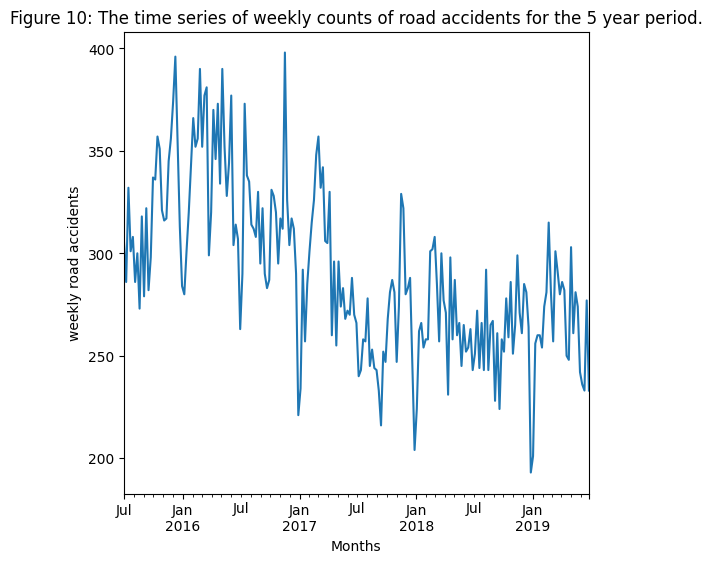

In [ ]:
plt.figure(figsize= (6,6))
time_plot_data['ACCIDENT_DATE'] = pd.to_datetime(pre_accident_categorical['ACCIDENT_DATE']).copy()
time_series_data = time_plot_data.groupby( pd.Grouper(key='ACCIDENT_DATE', freq='7D'))['SEVERITY'].count()
time_series_data.plot()
plt.xlabel('Months')
plt.ylabel('weekly road accidents')
plt.title('Figure 10: The time series of weekly counts of road accidents for the 5 year period.')


## Spatial and geographical influences
Examine all the spatial related variables and examine their influence on the severity of the road accident.

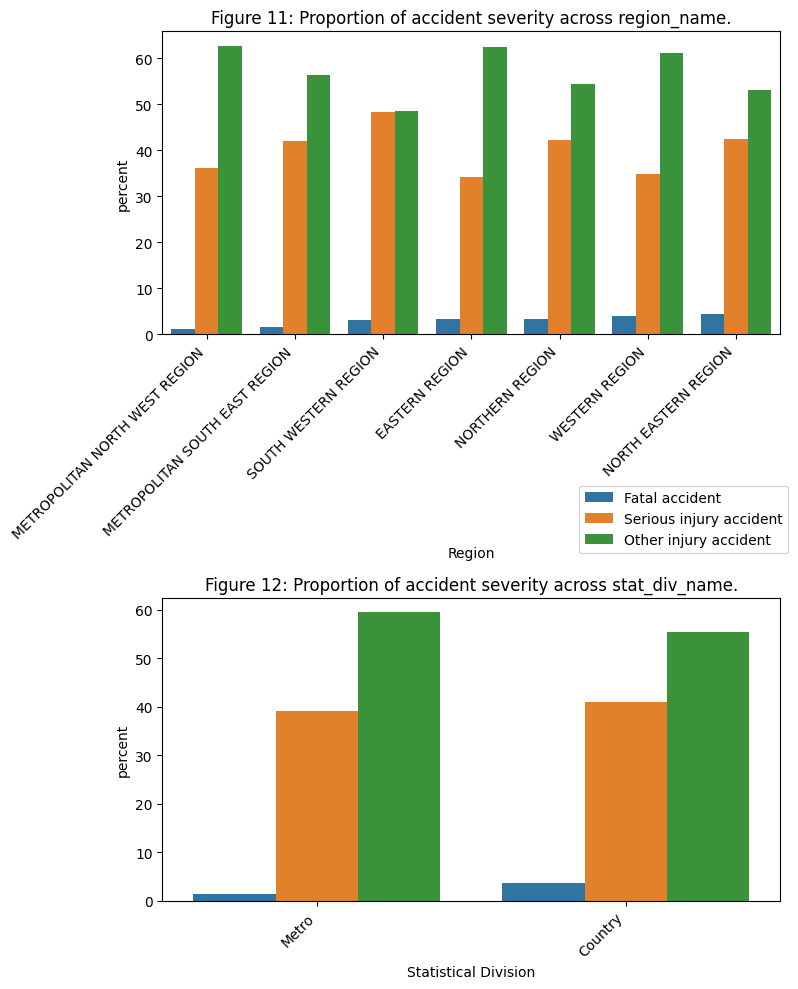

In [ ]:
location_plot_data = pd.DataFrame()
location_plot_data['LGA_NAME'] = pre_accident_categorical['LGA_NAME'].copy()
location_plot_data['REGION_NAME'] = pre_accident_categorical['REGION_NAME'].copy()
location_plot_data['STAT_DIV_NAME'] = pre_accident_categorical['STAT_DIV_NAME'].copy()
#include SEVERITY variable
location_plot_data = location_plot_data.join(post_accident_variables['SEVERITY'])

#Location categories
location_categories = ['REGION_NAME','STAT_DIV_NAME']
x_labels = ['Region','Statistical Division']

fig,axs = plt.subplots(2,1, figsize = (8,10))
axs = axs.ravel()
for i, location_category in enumerate(location_categories):
  df2 = (location_plot_data.groupby(location_category)['SEVERITY']
         .value_counts(normalize = True)
         .mul(100)
         .rename('percent')
         .reset_index())
  df2 = df2.sort_values('percent')
  sns.barplot(x=location_category, y = 'percent', hue='SEVERITY', data=df2, ax = axs[i])
  axs[i].get_legend().remove()
  axs[i].set_title(f'Figure {11+i}: Proportion of accident severity across {location_category.lower()}.')
  axs[i].set_xticklabels(axs[i].get_xticklabels(),  rotation = 45, ha="right")
  axs[i].set_xlabel(x_labels[i])

handles, labels = axs[i].get_legend_handles_labels()
plt.figlegend(handles, labels,loc='center right',  bbox_to_anchor=(0, 0, 1, 0.95))
plt.tight_layout()
# show the graph
plt.show()

### Local Government Area
The relative frequencies of classes of the categorical variable **LGA_NAME** with high cardinality.

Text(0.5, 1.0, 'Figure 13: Relative frequency of road accident inccidences across 89 Local Government Areas.')

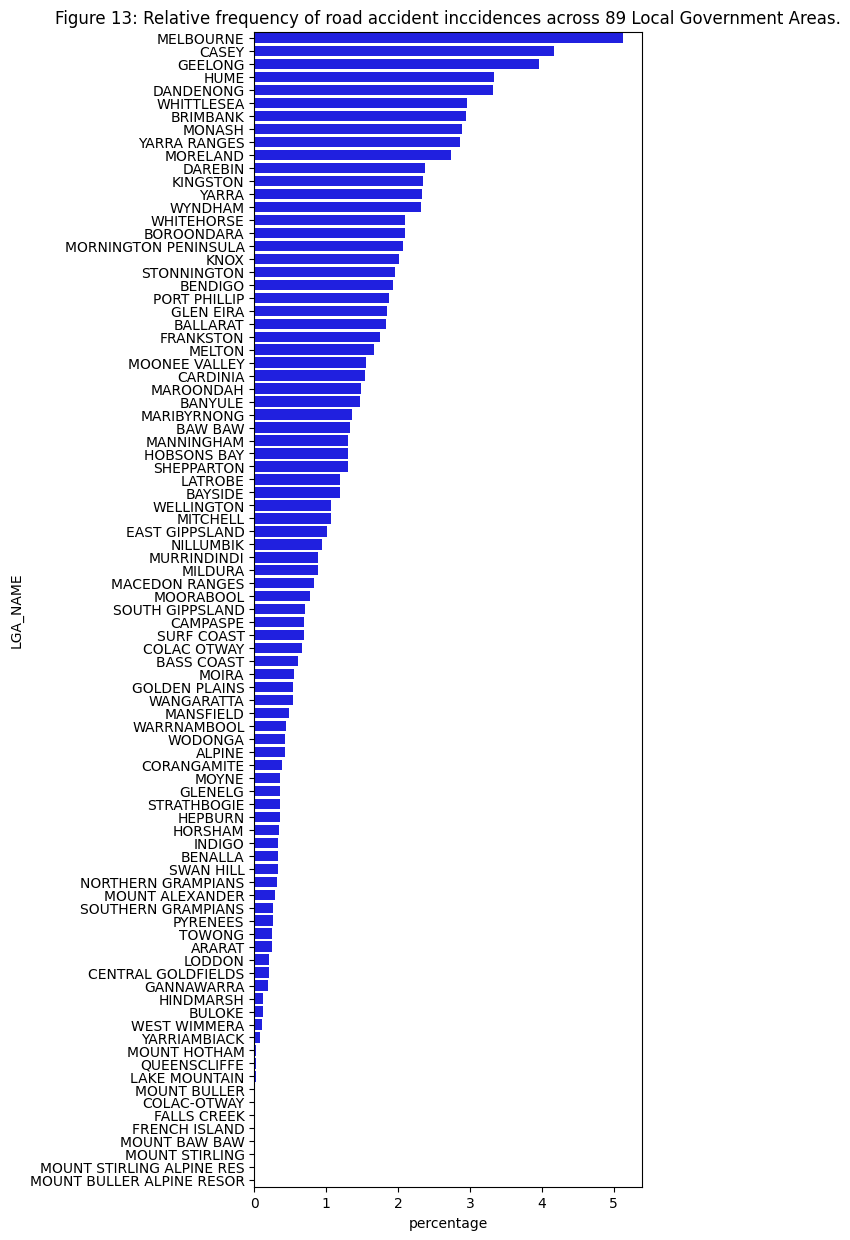

In [ ]:
df_lga = (location_plot_data['LGA_NAME']
      .value_counts(normalize = True)
      .mul(100)
      .rename('percentage')
      .reset_index()
      .rename(columns = {"index":"LGA_NAME"}))
fig = plt.figure(figsize = (5,15))
sns.barplot(df_lga, y= 'LGA_NAME',x = 'percentage', color = 'blue')
plt.title(f"Figure 13: Relative frequency of road accident inccidences across {len(df_lga)} Local Government Areas.")


The high cardinality of the categorical variable could be addressed by means of categorical feature consolidation, where the number of distinct values could be reduced by binning values of low instances to an **OTHER** category. Identifying such low frequent categories can be based on an accumulative sum of instances of descending frequent values exceeding some threshold. Then the categorical feature can be encoded using a supervised  target encoder that is extended to a multi-class labels.

The example categorical feature consolidation below is based on a 99.5% threshold, that is, the classes, whose accumulative sum of instances in descending order of proportion, that exceeds 99.5% are consolidated.

In [ ]:
threshold = 99.5
prop_sum = 0
i = 0
while prop_sum < threshold:
  prop = df_lga['percentage'][i]
  prop_sum += prop
  i += 1
# slice the series
other_lga_list = list(df_lga.loc[i:,'LGA_NAME'])

print(f"Possible categories to be consolidated are:")
for other in other_lga_list:
  print(other)

Possible categories to be consolidated are:
BULOKE
WEST WIMMERA
YARRIAMBIACK
MOUNT HOTHAM
QUEENSCLIFFE
LAKE MOUNTAIN
MOUNT BULLER
COLAC-OTWAY
FALLS CREEK
FRENCH ISLAND
MOUNT BAW BAW
MOUNT STIRLING
MOUNT STIRLING ALPINE RES
MOUNT BULLER ALPINE RESOR


 ### Local Government Area and Severity of Road Accidents Chloropleth map
 A Chloropleth map of Local Government Area boundaries for Victoria showing road accident severity proportions. The proportion of each class of SEVERITY is quantised and displayed for the LGA boundary map.

A shape file of the local governement area boundaries for the map of Victoria is converted to a GeoJSON format

In [ ]:
import geopandas as gpd
# set the filepath and load
fp = PATH + "vic_lga.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
#Export it as GeoJSON
map_df.to_file(PATH + "vic_lga2.json", driver='GeoJSON')

# Open the GeoJSON file of the LGA boundaries for Victoria
with open(PATH + "vic_lga2.json") as f:
  vic_lga = json.load(f)

The Local Government Area names in the GeoJSON file are checked and compared to the values for **LGA_NAME** variable in the dataset. A sample is given below:

In [ ]:
for i in range(len(location_plot_data['LGA_NAME'].unique())//8):
  print(f"GeoJASON LGA names = {vic_lga['features'][i]['properties']['LGA_NAME']}  and  dataset LGA names = {sorted(location_plot_data['LGA_NAME'].unique())[i]}")

GeoJASON LGA names = Alpine Shire  and  dataset LGA names = ALPINE
GeoJASON LGA names = Ararat Rural City  and  dataset LGA names = ARARAT
GeoJASON LGA names = Ballarat City  and  dataset LGA names = BALLARAT
GeoJASON LGA names = Banyule City  and  dataset LGA names = BANYULE
GeoJASON LGA names = Bass Coast Shire  and  dataset LGA names = BASS COAST
GeoJASON LGA names = Bass Coast Shire  and  dataset LGA names = BAW BAW
GeoJASON LGA names = Bass Coast Shire  and  dataset LGA names = BAYSIDE
GeoJASON LGA names = Baw Baw Shire  and  dataset LGA names = BENALLA
GeoJASON LGA names = Bayside City  and  dataset LGA names = BENDIGO
GeoJASON LGA names = Benalla Rural City  and  dataset LGA names = BOROONDARA
GeoJASON LGA names = Boroondara City  and  dataset LGA names = BRIMBANK


The differences need to be accounted for in order to produce a sketch of the road accident severity across LGAs as a chloropleth. The **LGA_NAME** values are matched with corresponding values in the GeoJSON data, and are recorded in a dictionary in order to map from one value to another.

In [ ]:
import re
# define the mapping function to match lga names using regex search
def regex_match(lga_word, geojson_lga):

    pattern = re.compile(r'\b' + re.escape(lga_word) + r'\b', re.IGNORECASE)

    for item in geojson_lga:
      lga_string = item['properties']['LGA_NAME']
      if pattern.search(lga_string):
        return lga_string

# the lga names objects
geojson_lga = vic_lga['features']
data_lga = sorted(location_plot_data['LGA_NAME'].unique())

#initilise the dictionary to map data values.
mapping_dict = {}
#loop through each value of LGA_NAME in the data set, apply the mapping function.
for lga_word in data_lga:
  mapping_dict[lga_word] = regex_match(lga_word, geojson_lga)
#print a sample of mapped entries in the mapping dictionary.
i=0
keys = list(mapping_dict)
while i < len(keys)//10:
  print(f' The dataset LGA_NAME value of {keys[i]} is matched with {mapping_dict[keys[i]]}')
  i+=1

 The dataset LGA_NAME value of ALPINE is matched with Alpine Shire
 The dataset LGA_NAME value of ARARAT is matched with Ararat Rural City
 The dataset LGA_NAME value of BALLARAT is matched with Ballarat City
 The dataset LGA_NAME value of BANYULE is matched with Banyule City
 The dataset LGA_NAME value of BASS COAST is matched with Bass Coast Shire
 The dataset LGA_NAME value of BAW BAW is matched with Baw Baw Shire
 The dataset LGA_NAME value of BAYSIDE is matched with Bayside City
 The dataset LGA_NAME value of BENALLA is matched with Benalla Rural City


To visualise the proportion of each class of severity out of all road crash instances in each LGA, the LGAs with the least number of instances are to be consolidated. Categorical feature consolidation is applied to **LGA_NAME**  at the 99% threshold.

In [ ]:
# THe minor classes identified by categorical feature consolidation at 99% threshold are provided in the 'others_lga' list
location_plot_consolidated_data = location_plot_data.replace(to_replace = other_lga_list,value = "OTHER")


The data is grouped by **LGA_NAME** and the proportion of **SEVERITY** classes are determined for each LGA.  Th maximum proportion of each **SEVERITY** class across all LGAs is determined, as this will define the colour scale for the Chloropleth map. The **SEVERITY** proportions for the OTHER label are expanded across the consolidated LGA labels and are renamed and included with the proportions dataframe.

Then using the mapping dictionary, the **LGA_NAME** labels are mapped to equivalent labels used in the GeoJASON dataset. The chloropleths show the proportion of each severity observed across all LGAs.

In [ ]:
def expand_other_lga(proportion_df,other_lga_list):
  """
  Assigns the other label data to all the consolidated lga values, returns as a complete dataframe.
  """
  other_df = proportion_df[proportion_df['LGA_NAME'] == 'OTHER'].copy()
  no_other_df = proportion_df[proportion_df['LGA_NAME'] != 'OTHER'].copy()
  fulltemp_df_list=[]
  for other_lga in other_lga_list:
    temp_df = other_df.replace(to_replace = 'OTHER',value = other_lga)
    fulltemp_df_list.append(temp_df)
  fulltemp_df = pd.concat(fulltemp_df_list, ignore_index = True)
  return pd.concat([no_other_df,fulltemp_df],ignore_index = True)

# Give the counts of each severity in the LGAs.
proportion_df = (location_plot_consolidated_data.groupby('LGA_NAME')['SEVERITY']
      .value_counts(normalize = True)
      .mul(100)
      .rename('proportion')
      .reset_index())

#Find maximum proportion per Severity
max_values = (proportion_df.groupby('SEVERITY')['proportion']
              .max()
              .rename('maximum')
              .reset_index())
#Find minimum proportion per Severity
min_values = (proportion_df.groupby('SEVERITY')['proportion']
              .min()
              .rename('minimum')
              .reset_index())

## expand the SEVERITY proportions associated with the OTHER category of **LGA_NAME** variable across each of the consolidated LGAs.
edited_proportion_df = expand_other_lga(proportion_df,other_lga_list)

# map the values in LGA_NAME
edited_proportion_df['LGA_NAME'] = edited_proportion_df['LGA_NAME'].apply(lambda x: mapping_dict[x])

In [ ]:
from plotly.subplots import make_subplots

for i,severity_class in enumerate(edited_proportion_df['SEVERITY'].unique()):
  # give counts per LGA for each severity class
  data = edited_proportion_df[edited_proportion_df.SEVERITY == severity_class]
  # give max value of count for each severity class
  max_value = max_values[max_values.SEVERITY == severity_class]['maximum'].values[0]
  # give max value of count for each severity class
  min_value = min_values[min_values.SEVERITY == severity_class]['minimum'].values[0]
  #define title
  title = f"Figure {14+i}: Chloropleth Map of the proportion of {severity_class}s across LGAs."
  # Plot Chloropleth per Severity
  fig = px.choropleth(data,
                      geojson=vic_lga,
                      locations='LGA_NAME',
                      color = 'proportion',
                      color_continuous_scale="Viridis",
                      range_color = (min_value,max_value),
                      featureidkey="properties.LGA_NAME",
                      projection = 'mercator')

  fig.update_layout(geo=dict(center=dict(lat=-36.9848, lon=143.3906)),
                    margin={"r":0,"t":0,"l":0,"b":0})
  fig.update_geos(fitbounds="locations", visible=False)
  # Reduce the horizontal size of the figure by setting the width parameter
  fig.update_layout(width=800)
  fig.update_layout(title_text=title, title_x = 0.05, title_y = 0.97)
  # display the graph
  fig.show()

In [4]:
%%html
<img src='/nbextensions/newplot.png' />
<img src='/nbextensions/newplot (1).png' />
<img src='/nbextensions/newplot (2).png' />

The Chloropleth map highlights variation in the distribtion